In [6]:
!pip install mlxtend

  Using cached mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)


In [7]:

#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from pandas.plotting import parallel_coordinates
import warnings
warnings.filterwarnings('ignore')


In [8]:
df = pd.read_csv(r'Apriori_basket_analysis.csv')
df

,Unnamed: 0,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


In [7]:
df.drop(df.columns[0],axis=1,inplace=True)
df

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,False,True,False,False,True,True,False,True,False,False,False,False,True,False,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,True,False,True,False,False,True,False,True,False,True,False,False,False,False,True,True
3,False,False,True,True,False,True,False,False,False,True,True,True,False,False,False,False
4,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,True
995,True,False,False,False,True,False,False,False,True,True,True,False,False,False,True,False
996,True,False,False,False,True,True,False,False,False,False,False,False,True,False,False,True
997,False,False,True,True,True,False,True,True,True,False,True,False,True,False,True,True


<Axes: >

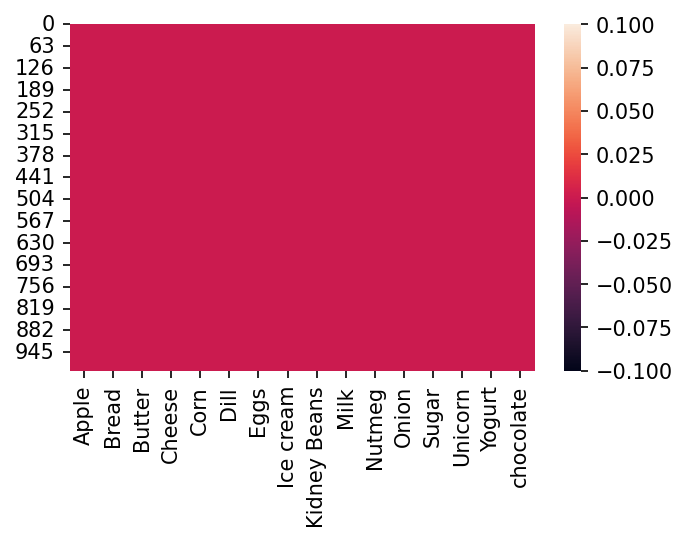

In [9]:

plt.figure(figsize=(5,3),dpi=150)
sns.heatmap(df.isnull())

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [False  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [False False  True  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [False False False  True  True  True  True  True  True  True  True  True
   True  True  True  True]
 [False False False False  True  True  True  True  True  True  True  True
   True  True  True  True]
 [False False False False False  True  True  True  True  True  True  True
   True  True  True  True]
 [False False False False False False  True  True  True  True  True  True
   True  True  True  True]
 [False False False False False False False  True  True  True  True  True
   True  True  True  True]
 [False False False False False False False False  True  True  True  True
   True  True  True  True]
 [False False False False False False False False False  True  True  True
   True  True  Tr

<Axes: >

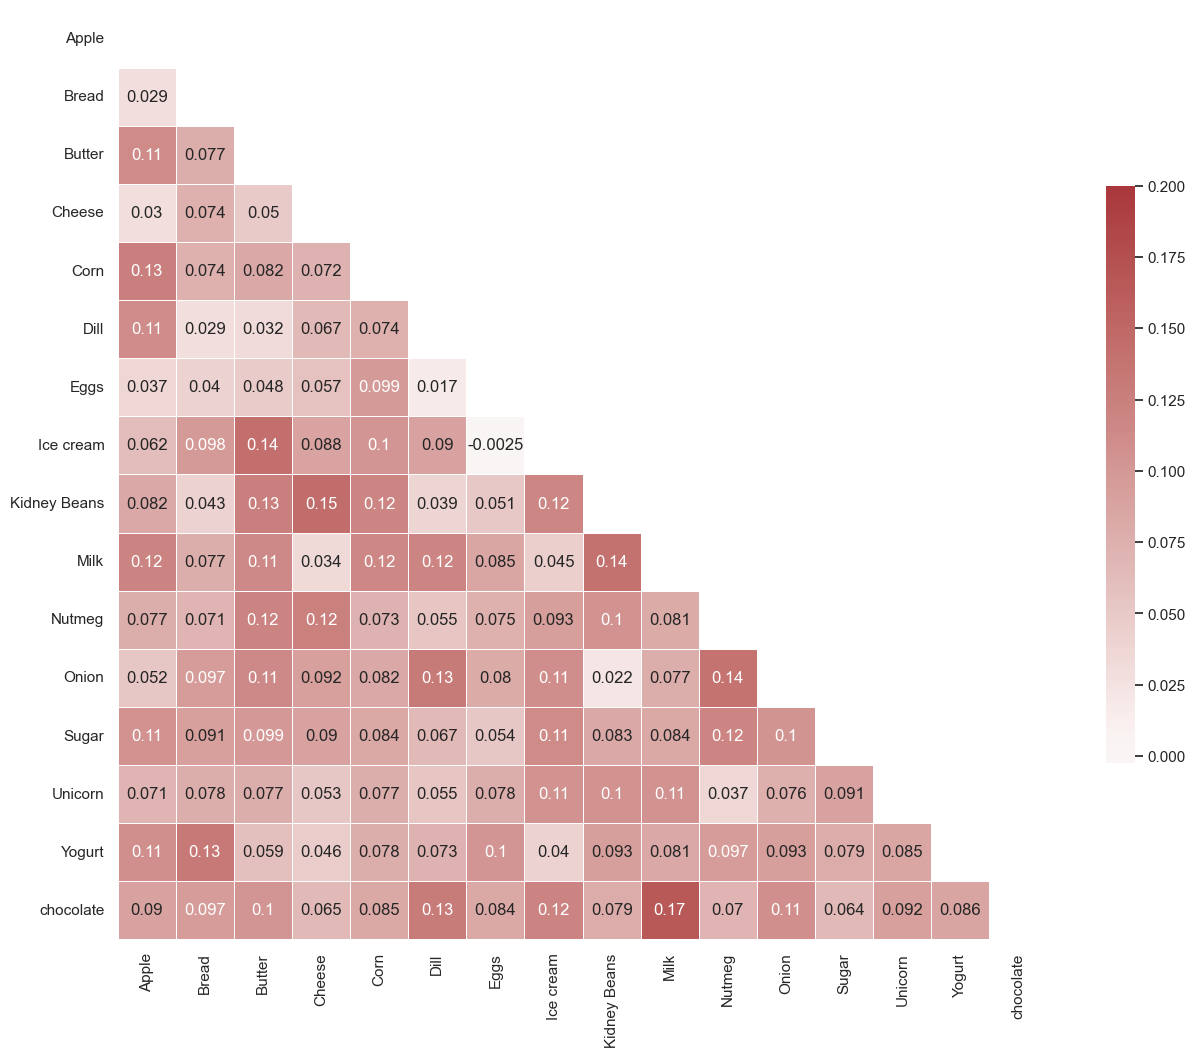

In [15]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = df.corr()
# print(corr)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
print(mask)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="vlag", vmax=0.2, center=0,
            annot=True, square=True, linewidths=0.5, cbar_kws={"shrink": .5})

In [16]:
df.shape

(999, 16)

In [5]:
df.mean()

Apple           0.383383
Bread           0.384384
Butter          0.420420
Cheese          0.404404
Corn            0.407407
Dill            0.398398
Eggs            0.384384
Ice cream       0.410410
Kidney Beans    0.408408
Milk            0.405405
Nutmeg          0.401401
Onion           0.403403
Sugar           0.409409
Unicorn         0.389389
Yogurt          0.420420
chocolate       0.421421
dtype: float64

In [6]:
# Compute frequent itemsets using the Apriori algorithm
# support({x}->{y}) = transaction containing both x and y / total transaction 
# confidence({x}->{y}) = transaction containing both x and y / transaction of x 
# lift ({x}->{y}) =( transaction containing both x and y / transaction of x) / Fraction of transactions containing y 
frequent_itemsets = apriori(df,
                            min_support = .006,
                            max_len = 3,
                            use_colnames = True)

# frequent_itemsets = frequent_itemsets.max()
frequent_itemsets

,support,itemsets
0,0.383383,(Apple)
1,0.384384,(Bread)
2,0.420420,(Butter)
3,0.404404,(Cheese)
4,0.407407,(Corn)
...,...,...
691,0.098098,"(chocolate, Yogurt, Onion)"
692,0.087087,"(Sugar, Yogurt, Unicorn)"
693,0.090090,"(chocolate, Sugar, Unicorn)"
694,0.095095,"(chocolate, Sugar, Yogurt)"


In [7]:
# Compute all association rules for frequent_itemsets
rules = association_rules(frequent_itemsets,
                            metric = 'support',
                            min_threshold=0.1)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Apple),0.384384,0.383383,0.154154,0.401042,1.046059,0.006788,1.029482,0.071524
1,(Apple),(Bread),0.383383,0.384384,0.154154,0.402089,1.046059,0.006788,1.029610,0.071407
2,(Butter),(Apple),0.420420,0.383383,0.188188,0.447619,1.167549,0.027006,1.116289,0.247602
3,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354,0.232730
4,(Cheese),(Apple),0.404404,0.383383,0.162162,0.400990,1.045925,0.007120,1.029393,0.073721
...,...,...,...,...,...,...,...,...,...,...
433,"(chocolate, Yogurt)",(Milk),0.198198,0.405405,0.104104,0.525253,1.295623,0.023753,1.252444,0.284572
434,"(Milk, Yogurt)",(chocolate),0.190190,0.421421,0.104104,0.547368,1.298862,0.023954,1.278255,0.284135
435,(chocolate),"(Milk, Yogurt)",0.421421,0.190190,0.104104,0.247031,1.298862,0.023954,1.075489,0.397691
436,(Milk),"(chocolate, Yogurt)",0.405405,0.198198,0.104104,0.256790,1.295623,0.023753,1.078836,0.383741


In [8]:
#Filterng the Rules for get the better result
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.2) &
                        (rules['lift'] > 1.0)]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Apple),0.384384,0.383383,0.154154,0.401042,1.046059,0.006788,1.029482,0.071524
1,(Apple),(Bread),0.383383,0.384384,0.154154,0.402089,1.046059,0.006788,1.029610,0.071407
2,(Butter),(Apple),0.420420,0.383383,0.188188,0.447619,1.167549,0.027006,1.116289,0.247602
3,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354,0.232730
4,(Cheese),(Apple),0.404404,0.383383,0.162162,0.400990,1.045925,0.007120,1.029393,0.073721
...,...,...,...,...,...,...,...,...,...,...
433,"(chocolate, Yogurt)",(Milk),0.198198,0.405405,0.104104,0.525253,1.295623,0.023753,1.252444,0.284572
434,"(Milk, Yogurt)",(chocolate),0.190190,0.421421,0.104104,0.547368,1.298862,0.023954,1.278255,0.284135
435,(chocolate),"(Milk, Yogurt)",0.421421,0.190190,0.104104,0.247031,1.298862,0.023954,1.075489,0.397691
436,(Milk),"(chocolate, Yogurt)",0.405405,0.198198,0.104104,0.256790,1.295623,0.023753,1.078836,0.383741


In [9]:
filtered_rules.sort_values('confidence',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
402,"(Dill, Unicorn)",(chocolate),0.168168,0.421421,0.101101,0.601190,1.426578,0.030231,1.450764,0.359474
390,"(Dill, Milk)",(chocolate),0.190190,0.421421,0.114114,0.600000,1.423753,0.033964,1.446446,0.367532
324,"(Cheese, Dill)",(Onion),0.177177,0.403403,0.102102,0.576271,1.428523,0.030628,1.407968,0.364570
391,"(Dill, chocolate)",(Milk),0.199199,0.405405,0.114114,0.572864,1.413065,0.033358,1.392051,0.365033
259,"(Kidney Beans, Ice cream)",(Butter),0.196196,0.420420,0.110110,0.561224,1.334913,0.027625,1.320902,0.312125
...,...,...,...,...,...,...,...,...,...,...
244,(Butter),"(Sugar, Apple)",0.420420,0.182182,0.100100,0.238095,1.306907,0.023507,1.073386,0.405181
321,(Butter),"(Nutmeg, Yogurt)",0.420420,0.192192,0.100100,0.238095,1.238839,0.019299,1.060248,0.332642
371,(Yogurt),"(Kidney Beans, Corn)",0.420420,0.195195,0.100100,0.238095,1.219780,0.018036,1.056306,0.310881
286,(Butter),"(Unicorn, Ice cream)",0.420420,0.185185,0.100100,0.238095,1.285714,0.022244,1.069444,0.383420


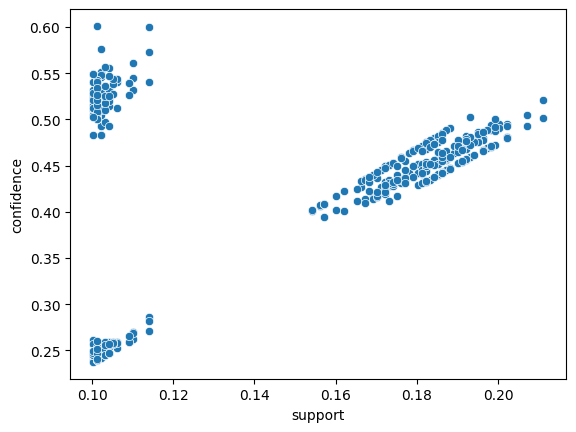

In [10]:
# Generate scatterplot confidence versus support
sns.scatterplot(x = "support", y = "confidence", data = filtered_rules)
plt.show()

In [11]:
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] >0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)]
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(Apple),(Butter),0.383383,0.420420,0.188188,0.490862,1.167549,0.027006,1.138354,0.232730
6,(Corn),(Apple),0.407407,0.383383,0.186186,0.457002,1.192025,0.029993,1.135579,0.271841
7,(Apple),(Corn),0.383383,0.407407,0.186186,0.485640,1.192025,0.029993,1.152096,0.261250
9,(Apple),(Dill),0.383383,0.398398,0.179179,0.467363,1.173104,0.026440,1.129478,0.239307
15,(Apple),(Kidney Beans),0.383383,0.408408,0.176176,0.459530,1.125173,0.019599,1.094587,0.180416
...,...,...,...,...,...,...,...,...,...,...
427,"(Kidney Beans, Yogurt)",(Nutmeg),0.194194,0.401401,0.101101,0.520619,1.297002,0.023151,1.248690,0.284177
428,"(Nutmeg, Yogurt)",(Kidney Beans),0.192192,0.408408,0.101101,0.526042,1.288028,0.022608,1.248193,0.276823
432,"(chocolate, Milk)",(Yogurt),0.211211,0.420420,0.104104,0.492891,1.172376,0.015307,1.142909,0.186402
433,"(chocolate, Yogurt)",(Milk),0.198198,0.405405,0.104104,0.525253,1.295623,0.023753,1.252444,0.284572


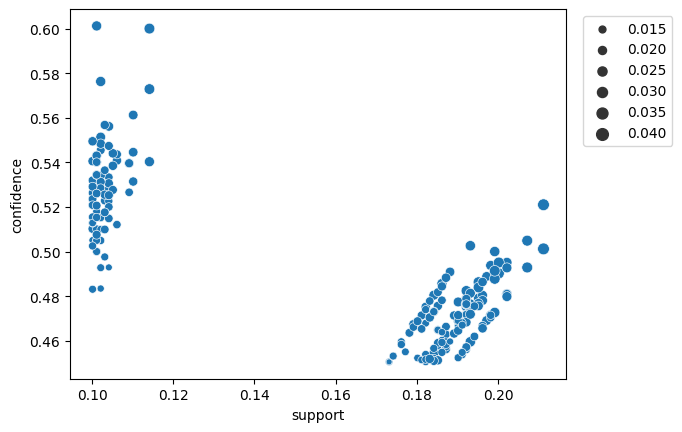

In [12]:
# Generate scatterplot confidence versus support

sns.scatterplot(x = "support", y = "confidence", size= 'leverage',data = filtered_rules)
plt.legend(bbox_to_anchor= (1.02, 1), loc='upper left',)
plt.show()

In [13]:
# add extra another rule where support more than 0.2 for given itemset
filtered_rules = rules[(rules['antecedent support'] > 0.02)&
                        (rules['consequent support'] > 0.01) &
                        (rules['confidence'] > 0.45) &
                        (rules['lift'] > 1.0)&
                        (rules['support']>0.195)]


In [14]:
filtered_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
66,(Butter),(Ice cream),0.420420,0.410410,0.207207,0.492857,1.200889,0.034662,1.162571,0.288629
67,(Ice cream),(Butter),0.410410,0.420420,0.207207,0.504878,1.200889,0.034662,1.170579,0.283728
68,(Kidney Beans),(Butter),0.408408,0.420420,0.202202,0.495098,1.177626,0.030499,1.147905,0.254963
69,(Butter),(Kidney Beans),0.420420,0.408408,0.202202,0.480952,1.177626,0.030499,1.139764,0.260247
70,(Butter),(Milk),0.420420,0.405405,0.198198,0.471429,1.162857,0.027757,1.124909,0.241639
71,(Milk),(Butter),0.405405,0.420420,0.198198,0.488889,1.162857,0.027757,1.133960,0.235537
72,(Butter),(Nutmeg),0.420420,0.401401,0.198198,0.471429,1.174457,0.029441,1.132484,0.256294
73,(Nutmeg),(Butter),0.401401,0.420420,0.198198,0.493766,1.174457,0.029441,1.144884,0.248150
74,(Butter),(Onion),0.420420,0.403403,0.197197,0.469048,1.162726,0.027598,1.123635,0.241472
75,(Onion),(Butter),0.403403,0.420420,0.197197,0.488834,1.162726,0.027598,1.133838,0.234584


In [15]:
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]

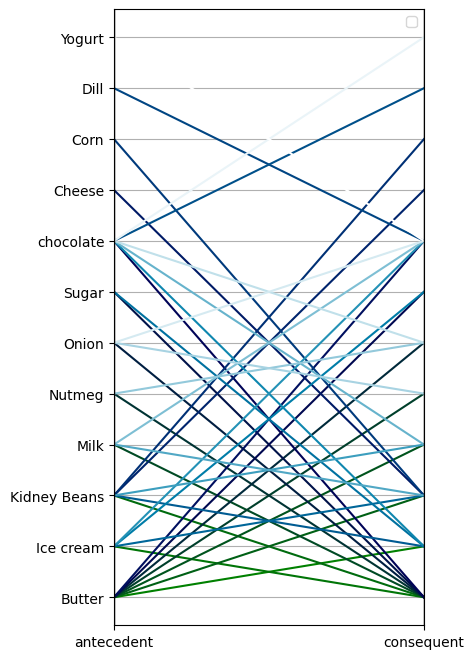

In [19]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(filtered_rules)
# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()